## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [3]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [4]:
data = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [5]:
data

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [7]:
# grouping the two columns and counting occurences (combinations), filling NaNs with value 0
freq_cat_seller = data.groupby(['category', 'isBestSeller']).size().unstack(fill_value=0)

# I found this with ChatGPT: dividing all elements by rows through the sum of values (True/False) in columns and converting them in %
freq_cat_seller_normalized = (freq_cat_seller.div(freq_cat_seller.sum(axis=1), axis=0)) * 100
round(freq_cat_seller_normalized, 2)

isBestSeller,False,True
category,,
3D Printers,99.60,0.40
3D Printing & Scanning,99.95,0.05
Abrasive & Finishing Products,98.00,2.00
Action Cameras,99.94,0.06
Adapters,98.82,1.18
...,...,...
Wind Instruments,97.20,2.80
Window Treatments,97.91,2.09
Women,98.80,1.20


In [8]:
# sorting df by highest proportion of having bestsellers
freq_cat_seller_top10 = round(freq_cat_seller_normalized.sort_values(by=True, ascending=False)[:10], 2)
freq_cat_seller_top10

isBestSeller,False,True
category,,
Grocery,94.19,5.81
Smart Home Security & Lighting,94.23,5.77
Health & Personal Care,94.23,5.77
Mobile Phone Accessories,95.75,4.25
Power & Hand Tools,96.47,3.53
"Billiard, Snooker & Pool",96.79,3.21
Pet Supplies,96.98,3.02
Home Brewing & Wine Making,97.15,2.85
Wind Instruments,97.20,2.80


***Insights on relationship between category and isBestSeller***
- The categories "Grocery", "Smart Home Security & Lighting" and "Health & Personal Care" have the most bestsellers by proportion with 5.81, 5.77 and 5.77.
- No other category has a proportion higher than 5%

2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [11]:
crosstab_result = pd.crosstab(data['category'], data['isBestSeller'])
crosstab_result.head(2)

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2


In [12]:
# Chi-square test for 'category' and 'isBestSeller'
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result)

In [13]:
chi2_pvalue

0.0

In [14]:
# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method='cramer')

0.1222829439760564

***Insights on correlation***
- I am not sure what a p-value of 0 means. It could be considered very very low which means we reject the null-hypothesis (that there is no dependency)
- The cramer of 0.12 suggests a very weak association

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

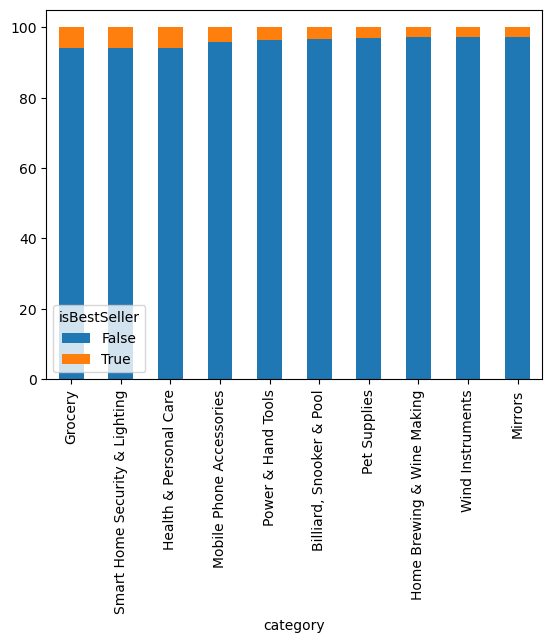

In [17]:
# chart is in proportion 
freq_cat_seller_top10.plot.bar(stacked=True)

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [19]:
prices = data[["price"]]
prices.head(2)

,price
0,21.99
1,23.99


In [20]:
type(prices)

pandas.core.frame.DataFrame

In [21]:
prices.describe()

,price
count,2.443651e+06
mean,8.924381e+01
std,3.456089e+02
min,0.000000e+00
25%,9.990000e+00
50%,1.909000e+01
75%,4.599000e+01
max,1.000000e+05


In [22]:
# tukey test for outliers
def tukeys_test_outliers(prices):
    Q1 = prices.quantile(0.25)
    Q3 = prices.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = prices[(prices < lower_bound) | (prices > upper_bound)]
    
    return outliers

In [23]:
outliers = tukeys_test_outliers(prices)
outliers

,price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2443646,NaN
2443647,NaN
2443648,NaN
2443649,NaN


In [24]:
type(outliers)

pandas.core.frame.DataFrame

In [25]:
data_prices_wo_outliers = data[~data['price'].isin(outliers['price'])].reset_index().drop("index", axis=1)
data_prices_wo_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2115958,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2115959,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2115960,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2115961,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

In [75]:
top_20_cat_1 = data_prices_wo_outliers["category"].value_counts().nlargest(20).index
top_20_cat = data_prices_wo_outliers[data_prices_wo_outliers["category"].isin(top_20_cat_1)]
top_20_cat.category.value_counts()

category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Make-up                                    18718
Skin Care                                  18686
Hair Care                                  18625
Birthday Gifts                             18398
Handmade Gifts                             17948
Handmade Home Décor                        17675
Luggage and travel gear                    17557
Women                                      17476
Fragrances                                 17431
Handmade Kitchen & Dining                  17346
Handmade Artwork                           17269
Handmade Home & Kitchen Products           17175
Handmade Jewellery                         17135
Men                                        16596
Baby                                       14883
Name: count

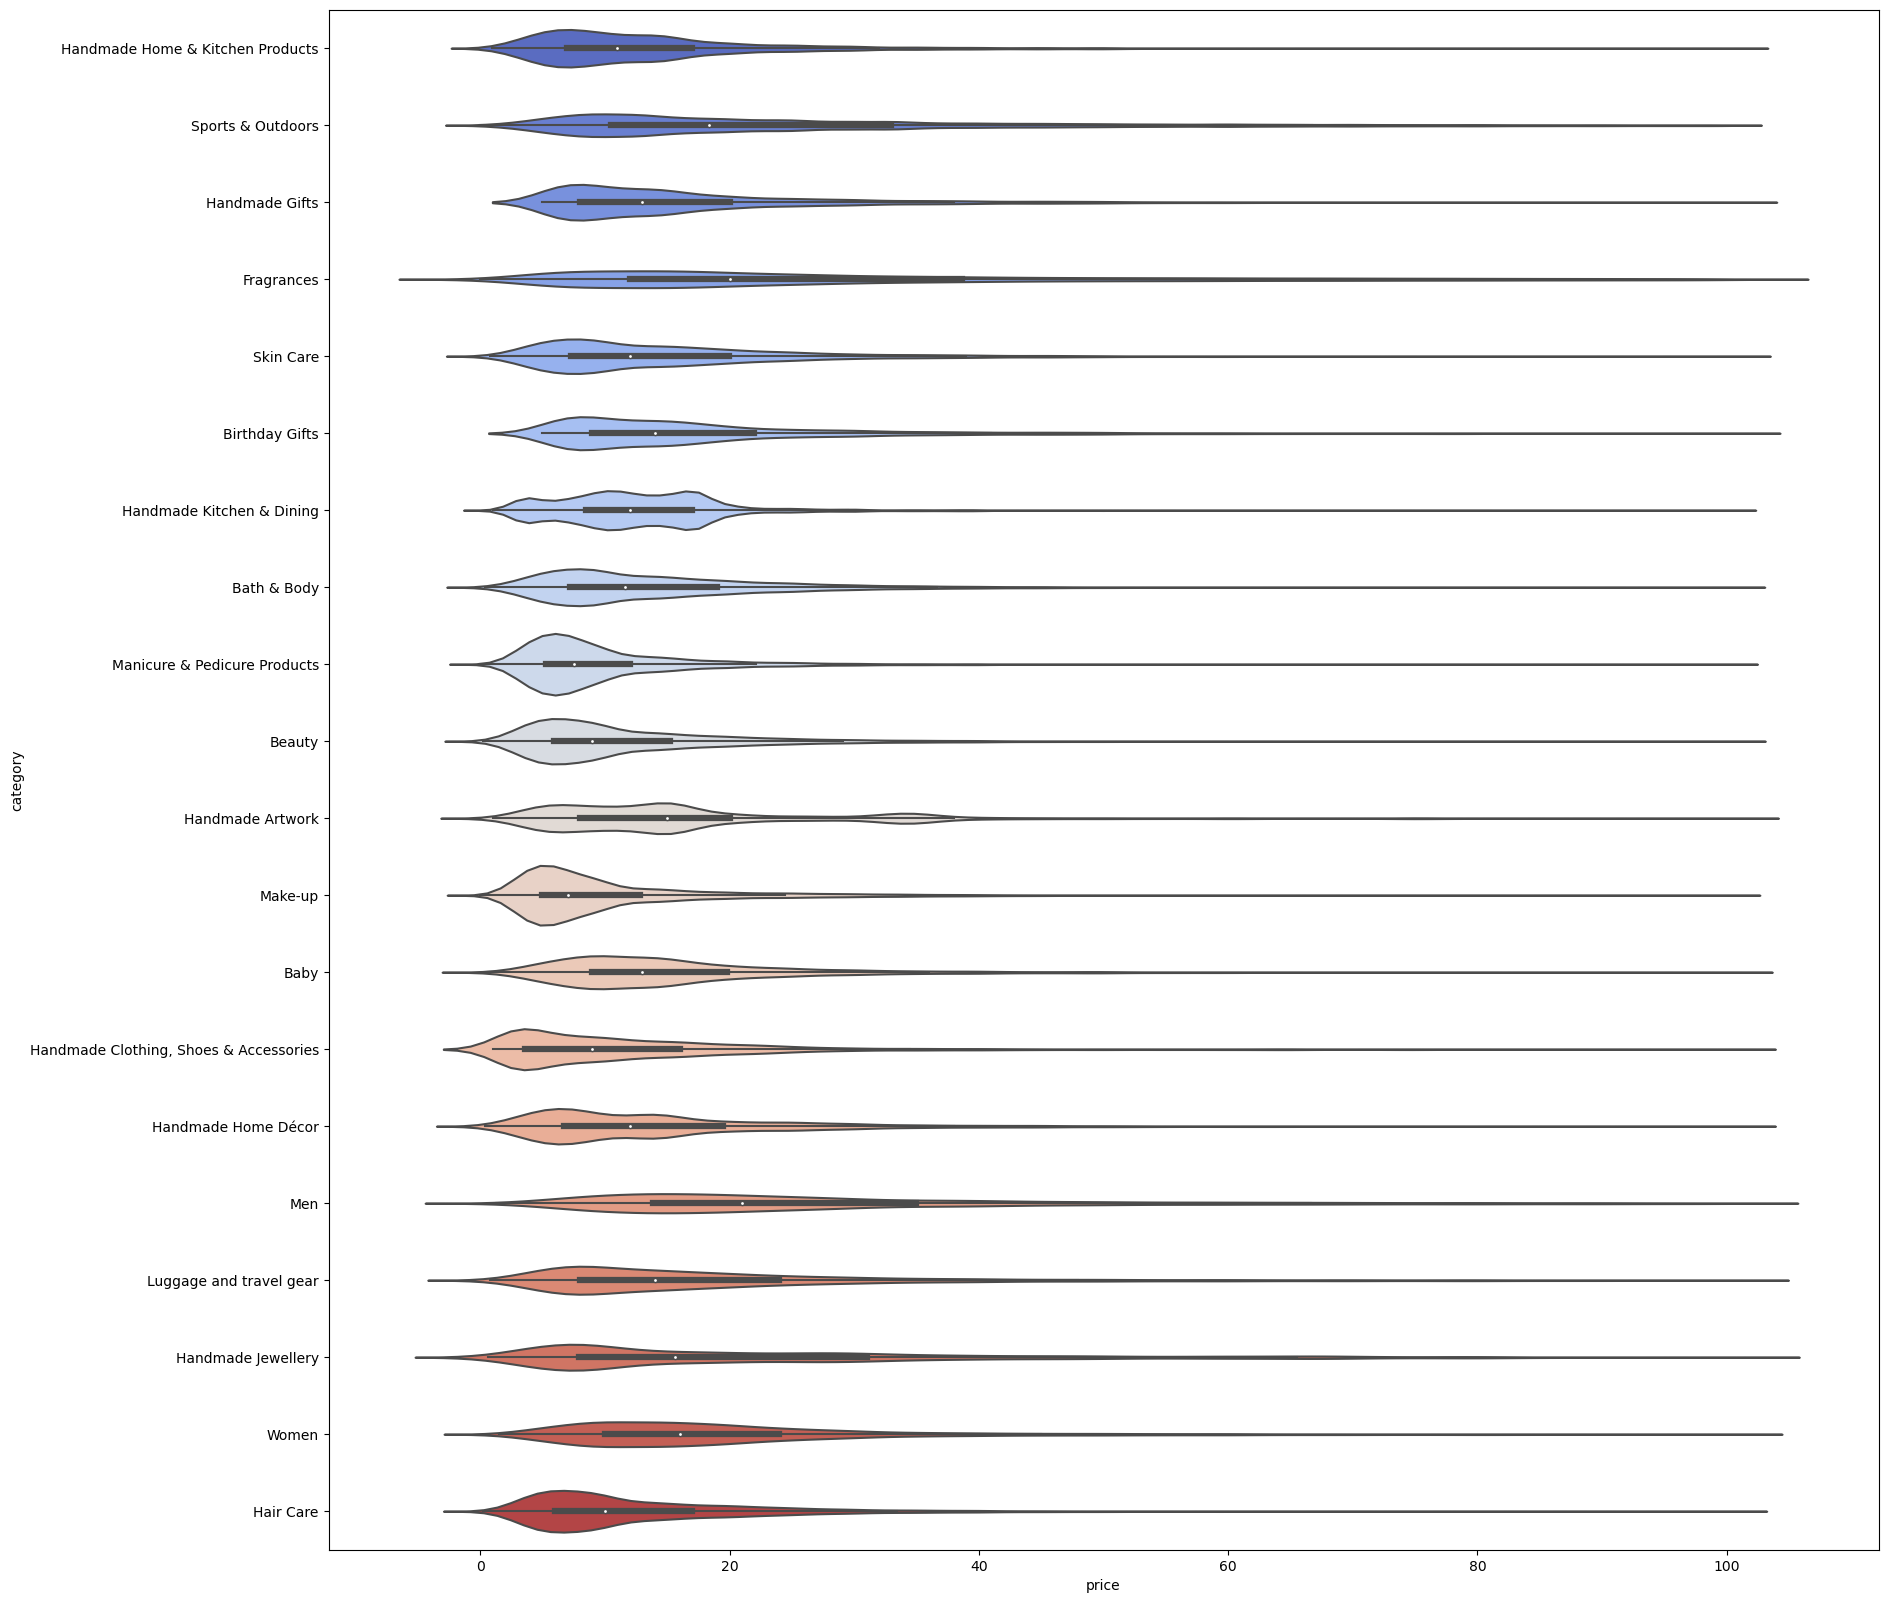

In [85]:
# Plotting a violin plot to visualize the distribution of 'price' for each 'category'
plt.figure(figsize=(20,20))
sns.violinplot(data=top_20_cat, x="price", y="category", palette="coolwarm")
plt.show()

In [99]:
# category with the highest median price across all categories (but without outliers)
median_price_cat = data_prices_wo_outliers.groupby("category")["price"].median()
median_price_cat.sort_values(ascending=False)[:10]

category
Desktop PCs               74.00
Boxing Shoes              69.79
Tablets                   69.00
Graphics Cards            68.54
Motherboards              67.92
Made in Italy Handmade    64.00
Digital Frames            63.90
Streaming Clients         62.68
Golf Shoes                62.39
Ski Helmets               61.33
Name: price, dtype: float64

***Insight on category with highest median price***

- The category "Desktop PCs" has the highest median price with 74.00

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

In [140]:
# filtering top 10 categories
top_10_cat_1 = data_prices_wo_outliers["category"].value_counts().nlargest(10).index
top_10_cat = data_prices_wo_outliers[data_prices_wo_outliers["category"].isin(top_10_cat_1)]
top_10_cat

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
73162,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
73163,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
73164,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
73165,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
73166,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2103019,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2103020,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2103021,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2110273,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


In [142]:
# grouping with mean 
top_10_cat_mean = top_10_cat.groupby("category")["price"].mean().reset_index()

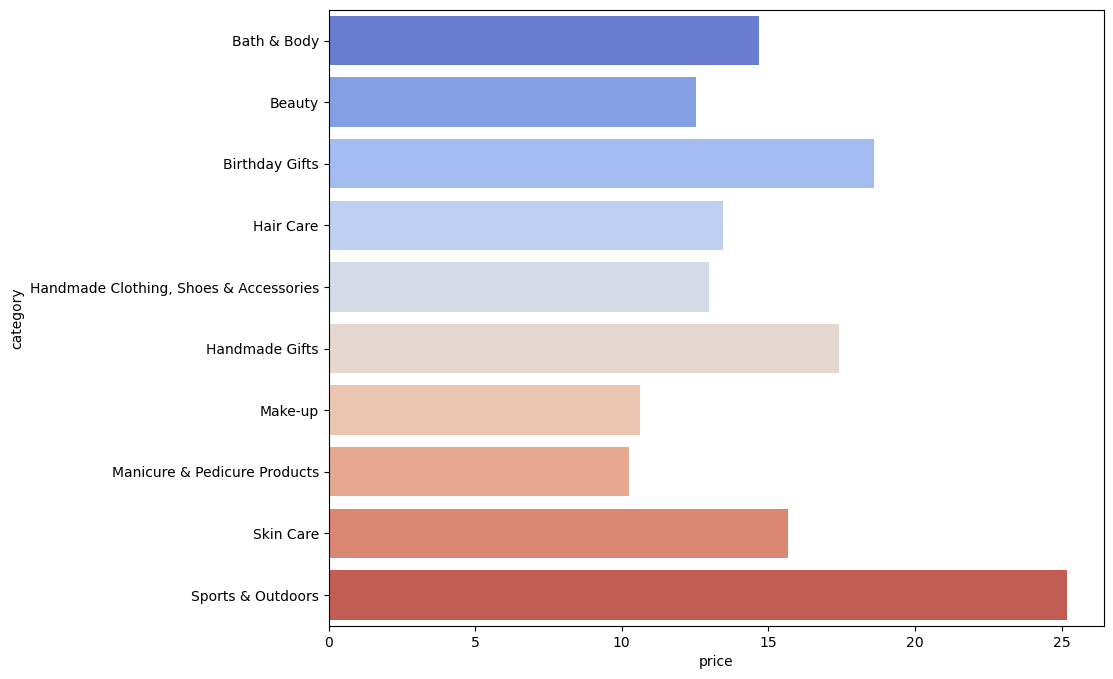

In [154]:
plt.figure(figsize=(10,8))
sns.barplot(data=top_10_cat_mean, x="price", y="category", palette="coolwarm")
plt.show()

In [158]:
# category with the highest mean price across all categories (but without outliers)
mean_price_cat = data_prices_wo_outliers.groupby("category")["price"].mean()
mean_price_cat.sort_values(ascending=False)[:10].round(2)

category
Motherboards         68.77
Boxing Shoes         67.42
Desktop PCs          66.92
Tablets              66.55
Graphics Cards       65.10
Digital Frames       60.75
Streaming Clients    60.24
Hockey Shoes         60.09
Computer Cases       58.34
Skiing Poles         57.87
Name: price, dtype: float64

***Insight on category with highest mean price***

- The category "Motherboards" has the highest mean price with 68.77

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [167]:
# filtering top 10 categories
top_10_cat_new_1 = data["category"].value_counts().nlargest(10).index
top_10_cat_new = data[data["category"].isin(top_10_cat_new_1)]
top_10_cat_new

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82165,89485,B08G2HBBB6,GoPro HERO9 - Waterproof Sports Camera with Fr...,4.5,5161,199.00,True,0,Sports & Outdoors
82166,89486,B09D15SFMQ,GoPro HERO10 Black - Waterproof Action Camera ...,4.4,2467,249.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


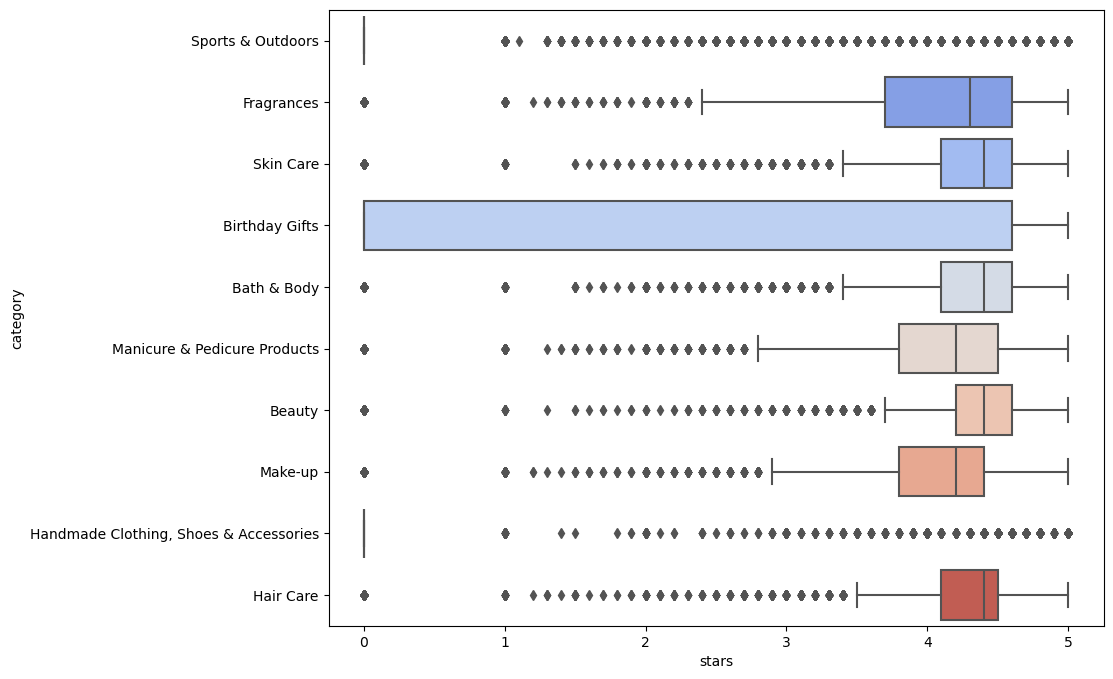

In [171]:
# Plotting a box plot to visualize the spread and outliers of 'stars' for each 'category'
plt.figure(figsize=(10,8))

sns.boxplot(data=top_10_cat_new, x="stars", y="category", palette="coolwarm")
plt.show()

In [163]:
# category with the highest median rating across all categories
median_rating_cat = data.groupby("category")["stars"].median()
median_rating_cat.sort_values(ascending=False)[:10].round(2)

category
Computer Memory                 4.7
Hobbies                         4.6
Beer, Wine & Spirits            4.6
Laptop Accessories              4.6
Kids' Play Figures              4.6
Building & Construction Toys    4.6
CPUs                            4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Camera & Photo Accessories      4.5
Name: stars, dtype: float64

***Insight on category with highest median rating***

- The category "Computer Memory" has the highest median rating with 4.7 stars

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?

In [183]:
data["price"].corr(data["stars"], method="pearson")

-0.12490673262148641

In [181]:
data["price"].corr(data["stars"], method="spearman")

-0.13316425462433912

***Insight on correlation between price and stars (rating) (with outliers in "price")***

- The correlation is very weak, both the linear and the monotonic relation, there is no significant correlation between the two.

In [186]:
a = data_prices_wo_outliers["price"].corr(data_prices_wo_outliers["stars"], method="pearson")
b = data_prices_wo_outliers["price"].corr(data_prices_wo_outliers["stars"], method="spearman")
print(f"The linear correlation for the dataframe without the outliers in the column 'price' is: {a}")
print(f"The monotonic correlation for the dataframe without the outliers in the column 'price' is: {b}")

The linear correlation for the dataframe without the outliers in the column 'price' is: -0.07767299878181323
The monotonic correlation for the dataframe without the outliers in the column 'price' is: -0.06679697280768307


***Insight 2 on correlation between price and stars (rating) (with outliers in "price")***

- Because I did not understand from the exercise whether it should be done analyzing the df with or without outliers in "price", I checked the latter too.
- But the correlation without outliers in "price" is even weaker, both the linear and the monotonic relation, there is no significant correlation between the two.

2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

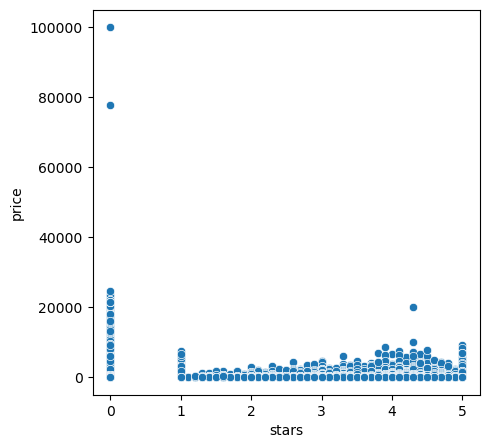

In [196]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=data, x='stars', y='price')
plt.show()

***Insight on scatterplot price and stars (rating) (with outliers in "price")***

- There are a lot of ratings with 0 stars and none between 0.01 and 0.99, spreading all over the prices where the other ratings also spread
- There are some outliers in prices which almost all have 0 stars
- The distribution between 1 and 5 leads towards uniform with a lower frequency of around 1 (1.1) - 2 stars

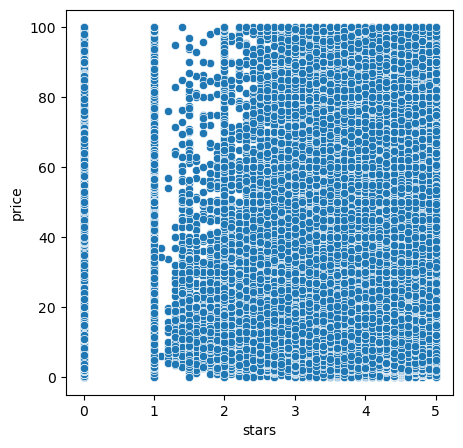

In [198]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=data_prices_wo_outliers, x='stars', y='price')
plt.show()

***Insight on scatterplot price and stars (rating) (without outliers in "price")***

- There are a lot of ratings with 0 stars and none between 0.01 and 0.99, spreading all over the prices
- Without the outliers, the distribution (especially between 1 and 5) looks even a lot more like a uniform distribution with also a lower frequency of around 1 (1.1) - 2 stars

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?

Bonus partly done in the codes directly following the respective other